In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10,
    epoch=500, patience=20
)

---
# Mouse
### Quake_10x_Bone_Marrow

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id  \
10X_P7_2_AAACCTGCAGTAACGG                 monocyte       CL:0000576   
10X_P7_2_AAACGGGAGACCGGAT                   T cell       CL:0000084   
10X_P7_2_AAACGGGAGCGCTCCA                   T cell       CL:0000084   
10X_P7_2_AAACGGGAGGACGAAA  granulocytopoietic cell       CL:0002191   
10X_P7_2_AAACGGGAGGTACTCT              promonocyte       CL:0000559   

                                        cell_type1  cluster  \
10X_P7_2_AAACCTGCAGTAACGG                 monocyte      0.0   
10X_P7_2_AAACGGGAGACCGGAT                   T cell      9.0   
10X_P7_2_AAACGGGAGCGCTCCA                   T cell      9.0   
10X_P7_2_AAACGGGAGGACGAAA  granulocytopoietic cell      3.0   
10X_P7_2_AAACGGGAGGTACTCT              promonocyte      2.0   

                                    dataset_name   donor free_annotation  \
10X_P7_2_AAACCTGCAGTAACGG  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGACCGGAT  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGCGCTCCA  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGGACGAAA  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGGTACTCT  Quake_10x_Bone_Marrow  3-F-56                   

                          gender        organ      organism     plate  \
10X_P7_2_AAACCTGCAGTAACGG      F  Bone Marrow  Mus musculus  10X_P7_2   
10X_P7_2_AAACGGGAGACCGGAT      F  Bone Marrow  Mus musculus  10X_P7_2   
10X_P7_2_AAACGGGAGCGCTCCA      F  Bone Marrow  Mus musculus  10X_P7_2   
10X_P7_2_AAACGGGAGGACGAAA      F  Bone Marrow  Mus musculus  10X_P7_2   
10X_P7_2_AAACGGGAGGTACTCT      F  Bone Marrow  Mus musculus  10X_P7_2   

                          platform region  
10X_P7_2_AAACCTGCAGTAACGG      10x         
10X_P7_2_AAACGGGAGACCGGAT      10x         
10X_P7_2_AAACGGGAGCGCTCCA      10x         
10X_P7_2_AAACGGGAGGACGAAA      10x         
10X_P7_2_AAACGGGAGGTACTCT      10x

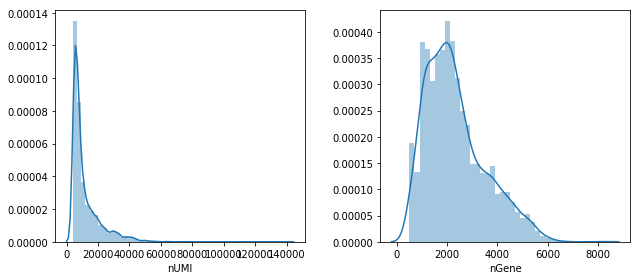

In [2]:
quake_10x_bone_marrow = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Bone_Marrow/data.h5")
utils.peek(quake_10x_bone_marrow, "Quake_10x_Bone_Marrow")
quake_10x_bone_marrow = quake_10x_bone_marrow.normalize()
quake_10x_bone_marrow.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor", cat_dim=20)
quake_10x_bone_marrow_model = cb.directi.fit_DIRECTi(
    quake_10x_bone_marrow, quake_10x_bone_marrow.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x_Bone_Marrow/model_0"
)
quake_10x_bone_marrow.latent = quake_10x_bone_marrow_model.inference(quake_10x_bone_marrow)

[DIRECTi epoch 0] train=2.652, val=2.741, time elapsed=1.4s Regular save...
[DIRECTi epoch 1] train=2.649, val=2.734, time elapsed=0.3s
[DIRECTi epoch 2] train=2.637, val=2.719, time elapsed=0.3s
[DIRECTi epoch 3] train=2.619, val=2.693, time elapsed=0.4s
[DIRECTi epoch 4] train=2.587, val=2.634, time elapsed=0.4s
[DIRECTi epoch 5] train=2.250, val=1.358, time elapsed=0.3s
[DIRECTi epoch 6] train=1.239, val=5.547, time elapsed=0.4s
[DIRECTi epoch 7] train=1.006, val=3.851, time elapsed=0.3s
[DIRECTi epoch 8] train=1.001, val=2.106, time elapsed=0.3s
[DIRECTi epoch 9] train=0.996, val=1.771, time elapsed=0.3s
[DIRECTi epoch 10] train=0.993, val=1.593, time elapsed=0.3s Regular save...
[DIRECTi epoch 11] train=0.986, val=1.181, time elapsed=0.3s
[DIRECTi epoch 12] train=0.948, val=1.158, time elapsed=0.3s
[DIRECTi epoch 13] train=0.918, val=1.203, time elapsed=0.3s
[DIRECTi epoch 14] train=0.903, val=1.109, time elapsed=0.4s
[DIRECTi epoch 15] train=0.898, val=1.167, time elapsed=0.4s
[D

[  Info   ] Computing tSNE...


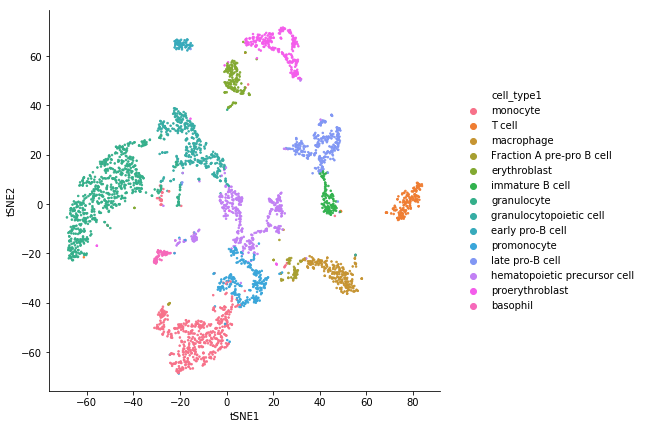

In [4]:
plot = quake_10x_bone_marrow.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Bone_Marrow/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


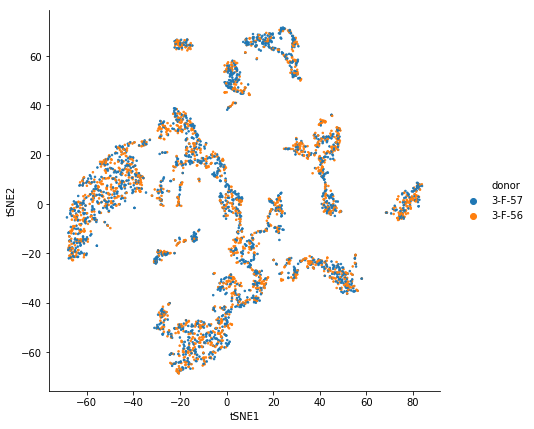

In [5]:
plot = quake_10x_bone_marrow.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Bone_Marrow/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


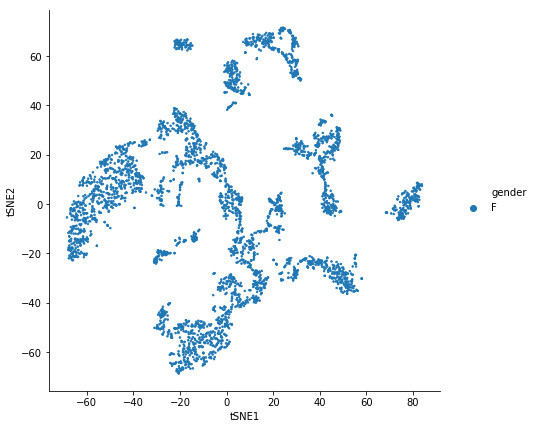

In [6]:
plot = quake_10x_bone_marrow.visualize_latent("gender")
plot.get_figure().savefig("Quake_10x_Bone_Marrow/gender.pdf", bbox_inches="tight")

In [7]:
%%capture capio
quake_10x_bone_marrow_models = [quake_10x_bone_marrow_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_bone_marrow_models.append(cb.directi.fit_DIRECTi(
        quake_10x_bone_marrow, quake_10x_bone_marrow.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Bone_Marrow/model_%d" % i
    ))
quake_10x_bone_marrow_blast = cb.blast.BLAST(quake_10x_bone_marrow_models, quake_10x_bone_marrow, 
                                               keep_exprs=True).build_empirical()
quake_10x_bone_marrow_blast.save("Quake_10x_Bone_Marrow")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Bone_Marrow/model_1/checkpoint-202
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Bone_Marrow/model_2/checkpoint-212
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Bone_Marrow/model_3/checkpoint-192


In [8]:
with open("Quake_10x_Bone_Marrow/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Bone_Marrow/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(quake_10x_bone_marrow_blast, "Quake_10x_Bone_Marrow")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9767
Accuracy = 0.9812


### Quake_Smart-seq2_Bone_Marrow

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id       cell_type1  \
A22.D042044.3_9_M.1.1     immature B cell       CL:0000816  immature B cell   
C5.D042044.3_9_M.1.1      late pro-B cell       CL:0002048  late pro-B cell   
D10.D042044.3_9_M.1.1          pro-B cell       CL:0000826       pro-B cell   
E13.D042044.3_9_M.1.1          macrophage       CL:0000235       macrophage   
F19.D042044.3_9_M.1.1     late pro-B cell       CL:0002048  late pro-B cell   

                       channel  cluster                  dataset_name  donor  \
A22.D042044.3_9_M.1.1  D042044      6.0  Quake_Smart-seq2_Bone_Marrow  3_9_M   
C5.D042044.3_9_M.1.1   D042044      8.0  Quake_Smart-seq2_Bone_Marrow  3_9_M   
D10.D042044.3_9_M.1.1  D042044      2.0  Quake_Smart-seq2_Bone_Marrow  3_9_M   
E13.D042044.3_9_M.1.1  D042044     10.0  Quake_Smart-seq2_Bone_Marrow  3_9_M   
F19.D042044.3_9_M.1.1  D042044      8.0  Quake_Smart-seq2_Bone_Marrow  3_9_M   

                                              free_annotation gender  \
A22.D042044.3_9_M.1.1                                              M   
C5.D042044.3_9_M.1.1                    Dntt- late pro-B cell      M   
D10.D042044.3_9_M.1.1  pre-B cell (Philadelphia nomenclature)      M   
E13.D042044.3_9_M.1.1                                              M   
F19.D042044.3_9_M.1.1                   Dntt- late pro-B cell      M   

                             organ      organism    platform   region  
A22.D042044.3_9_M.1.1  Bone Marrow  Mus musculus  Smart-seq2  B-cells  
C5.D042044.3_9_M.1.1   Bone Marrow  Mus musculus  Smart-seq2  B-cells  
D10.D042044.3_9_M.1.1  Bone Marrow  Mus musculus  Smart-seq2  B-cells  
E13.D042044.3_9_M.1.1  Bone Marrow  Mus musculus  Smart-seq2  B-cells  
F19.D042044.3_9_M.1.1  Bone Marrow  Mus musculus  Smart-seq2  B-cells

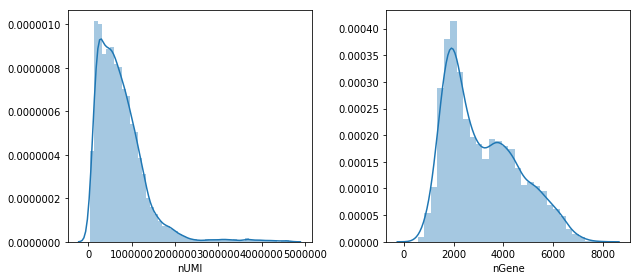

In [10]:
quake_smart_seq2_bone_marrow = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Bone_Marrow/data.h5")
utils.peek(quake_smart_seq2_bone_marrow, "Quake_Smart-seq2_Bone_Marrow")
quake_smart_seq2_bone_marrow = quake_smart_seq2_bone_marrow.normalize()
quake_smart_seq2_bone_marrow.obs.head()

In [11]:
opt_model_kwargs = dict(batch_effect="donor",  cat_dim=20)
quake_smart_seq2_bone_marrow_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_bone_marrow, quake_smart_seq2_bone_marrow.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Bone_Marrow/model_0"
)
quake_smart_seq2_bone_marrow.latent = quake_smart_seq2_bone_marrow_model.inference(quake_smart_seq2_bone_marrow)

[DIRECTi epoch 0] train=2.800, val=2.813, time elapsed=1.2s Regular save...
[DIRECTi epoch 1] train=2.769, val=2.778, time elapsed=0.5s
[DIRECTi epoch 2] train=2.715, val=2.675, time elapsed=0.5s
[DIRECTi epoch 3] train=2.192, val=1.424, time elapsed=0.5s
[DIRECTi epoch 4] train=0.945, val=0.931, time elapsed=0.4s
[DIRECTi epoch 5] train=0.867, val=0.936, time elapsed=0.5s
[DIRECTi epoch 6] train=0.865, val=0.881, time elapsed=0.5s
[DIRECTi epoch 7] train=0.862, val=0.924, time elapsed=0.4s
[DIRECTi epoch 8] train=0.861, val=0.900, time elapsed=0.4s
[DIRECTi epoch 9] train=0.858, val=0.949, time elapsed=0.4s
[DIRECTi epoch 10] train=0.857, val=0.877, time elapsed=0.4s Regular save...
[DIRECTi epoch 11] train=0.849, val=0.861, time elapsed=0.5s
[DIRECTi epoch 12] train=0.813, val=0.821, time elapsed=0.5s
[DIRECTi epoch 13] train=0.791, val=0.820, time elapsed=0.4s
[DIRECTi epoch 14] train=0.780, val=0.790, time elapsed=0.4s
[DIRECTi epoch 15] train=0.774, val=0.809, time elapsed=0.5s
[D

[  Info   ] Computing tSNE...


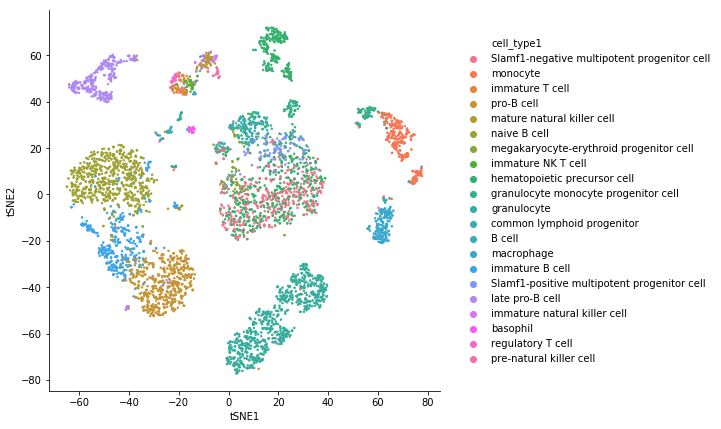

In [12]:
plot = quake_smart_seq2_bone_marrow.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Bone_Marrow/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


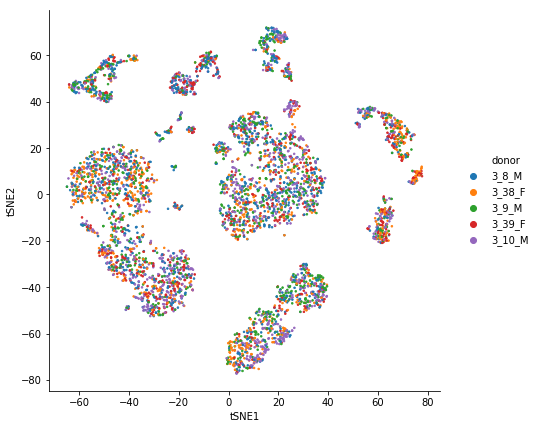

In [13]:
plot = quake_smart_seq2_bone_marrow.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Bone_Marrow/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


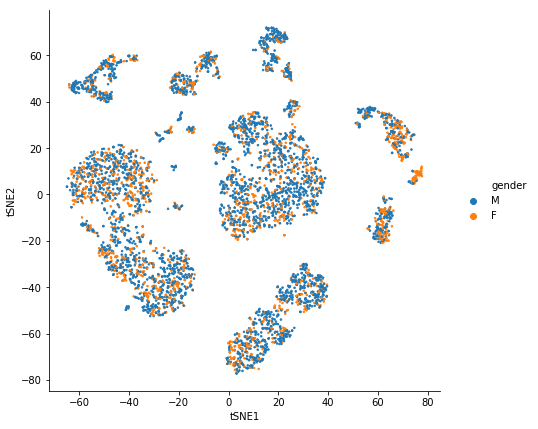

In [14]:
plot = quake_smart_seq2_bone_marrow.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Bone_Marrow/gender.pdf", bbox_inches="tight")

In [15]:
%%capture capio
quake_smart_seq2_bone_marrow_models = [quake_smart_seq2_bone_marrow_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_bone_marrow_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_bone_marrow, quake_smart_seq2_bone_marrow.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Bone_Marrow/model_%d" % i
    ))
quake_smart_seq2_bone_marrow_blast = cb.blast.BLAST(quake_smart_seq2_bone_marrow_models, quake_smart_seq2_bone_marrow, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_bone_marrow_blast.save("Quake_Smart-seq2_Bone_Marrow")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Bone_Marrow/model_1/checkpoint-189
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Bone_Marrow/model_2/checkpoint-163
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Bone_Marrow/model_3/checkpoint-148


In [16]:
with open("Quake_Smart-seq2_Bone_Marrow/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Bone_Marrow/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [17]:
utils.self_projection(quake_smart_seq2_bone_marrow_blast, "Quake_Smart-seq2_Bone_Marrow")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9184
Accuracy = 0.8770


## Mouse aligned （discrete cell type）

In [18]:
if not os.path.exists("ALIGNED_Mus_musculus_Bone_Marrow"):
    os.makedirs("ALIGNED_Mus_musculus_Bone_Marrow")
quake_smart_seq2_bone_marrow.obs["quake_smart_seq2_bone_marrow_donor"] = \
    quake_smart_seq2_bone_marrow.obs["donor"]
quake_10x_bone_marrow.obs["quake_10x_bone_marrow_donor"] = \
    quake_10x_bone_marrow.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_bone_marrow=quake_10x_bone_marrow,
    quake_smart_seq2_bone_marrow=quake_smart_seq2_bone_marrow
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [19]:
mouse.obs.head()

cell_ontology_class cell_ontology_id  \
10X_P7_2_AAACCTGCAGTAACGG                 monocyte       CL:0000576   
10X_P7_2_AAACGGGAGACCGGAT                   T cell       CL:0000084   
10X_P7_2_AAACGGGAGCGCTCCA                   T cell       CL:0000084   
10X_P7_2_AAACGGGAGGACGAAA  granulocytopoietic cell       CL:0002191   
10X_P7_2_AAACGGGAGGTACTCT              promonocyte       CL:0000559   

                                        cell_type1 channel  cluster  \
10X_P7_2_AAACCTGCAGTAACGG                 monocyte     NaN      0.0   
10X_P7_2_AAACGGGAGACCGGAT                   T cell     NaN      9.0   
10X_P7_2_AAACGGGAGCGCTCCA                   T cell     NaN      9.0   
10X_P7_2_AAACGGGAGGACGAAA  granulocytopoietic cell     NaN      3.0   
10X_P7_2_AAACGGGAGGTACTCT              promonocyte     NaN      2.0   

                                    dataset_name   donor free_annotation  \
10X_P7_2_AAACCTGCAGTAACGG  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGACCGGAT  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGCGCTCCA  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGGACGAAA  Quake_10x_Bone_Marrow  3-F-56                   
10X_P7_2_AAACGGGAGGTACTCT  Quake_10x_Bone_Marrow  3-F-56                   

                          gender  latent_1    ...      latent_9        organ  \
10X_P7_2_AAACCTGCAGTAACGG      F  0.970451    ...      2.026205  Bone Marrow   
10X_P7_2_AAACGGGAGACCGGAT      F  1.566558    ...      3.394835  Bone Marrow   
10X_P7_2_AAACGGGAGCGCTCCA      F  0.933213    ...      0.349225  Bone Marrow   
10X_P7_2_AAACGGGAGGACGAAA      F -0.150215    ...     -0.029586  Bone Marrow   
10X_P7_2_AAACGGGAGGTACTCT      F -0.128274    ...     -2.329077  Bone Marrow   

                               organism     plate  platform  \
10X_P7_2_AAACCTGCAGTAACGG  Mus musculus  10X_P7_2       10x   
10X_P7_2_AAACGGGAGACCGGAT  Mus musculus  10X_P7_2       10x   
10X_P7_2_AAACGGGAGCGCTCCA  Mus musculus  10X_P7_2       10x   
10X_P7_2_AAACGGGAGGACGAAA  Mus musculus  10X_P7_2       10x   
10X_P7_2_AAACGGGAGGTACTCT  Mus musculus  10X_P7_2       10x   

                           quake_10x_bone_marrow_donor  \
10X_P7_2_AAACCTGCAGTAACGG                       3-F-56   
10X_P7_2_AAACGGGAGACCGGAT                       3-F-56   
10X_P7_2_AAACGGGAGCGCTCCA                       3-F-56   
10X_P7_2_AAACGGGAGGACGAAA                       3-F-56   
10X_P7_2_AAACGGGAGGTACTCT                       3-F-56   

                           quake_smart_seq2_bone_marrow_donor  region  \
10X_P7_2_AAACCTGCAGTAACGG                                 NaN           
10X_P7_2_AAACGGGAGACCGGAT                                 NaN           
10X_P7_2_AAACGGGAGCGCTCCA                                 NaN           
10X_P7_2_AAACGGGAGGACGAAA                                 NaN           
10X_P7_2_AAACGGGAGGTACTCT                                 NaN           

                               tSNE1      tSNE2  
10X_P7_2_AAACCTGCAGTAACGG -27.045599 -44.263683  
10X_P7_2_AAACGGGAGACCGGAT  82.452019   7.060766  
10X_P7_2_AAACGGGAGCGCTCCA  77.908028  -3.704223  
10X_P7_2_AAACGGGAGGACGAAA -25.673075  28.301052  
10X_P7_2_AAACGGGAGGTACTCT  -3.605457 -33.641716  

[5 rows x 28 columns]

In [20]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "quake_smart_seq2_bone_marrow_donor", "quake_10x_bone_marrow_donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01),
    cat_dim=20
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Bone_Marrow/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.422, val=2.410, time elapsed=2.3s Regular save...
[DIRECTi epoch 1] train=2.373, val=2.287, time elapsed=1.2s
[DIRECTi epoch 2] train=1.443, val=0.980, time elapsed=1.1s
[DIRECTi epoch 3] train=0.903, val=0.915, time elapsed=1.2s
[DIRECTi epoch 4] train=0.891, val=0.889, time elapsed=1.1s
[DIRECTi epoch 5] train=0.860, val=0.857, time elapsed=1.2s
[DIRECTi epoch 6] train=0.837, val=0.835, time elapsed=1.1s
[DIRECTi epoch 7] train=0.818, val=0.826, time elapsed=1.2s
[DIRECTi epoch 8] train=0.802, val=0.803, time elapsed=1.1s
[DIRECTi epoch 9] train=0.788, val=0.791, time elapsed=1.2s
[DIRECTi epoch 10] train=0.777, val=0.781, time elapsed=1.2s Regular save...
[DIRECTi epoch 11] train=0.766, val=0.775, time elapsed=1.1s
[DIRECTi epoch 12] train=0.755, val=0.767, time elapsed=1.1s
[DIRECTi epoch 13] train=0.743, val=0.756, time elapsed=1.1s
[DIRECTi epoch 14] train=0.734, val=0.749, time elapsed=1.2s
[DIRECTi epoch 15] train=0.729, val=0.744, time elapsed=1.2s
[D

[  Info   ] Computing tSNE...


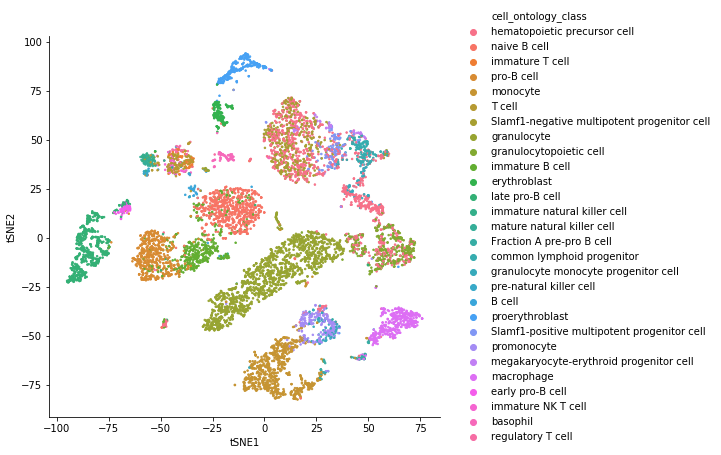

In [21]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bone_Marrow/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


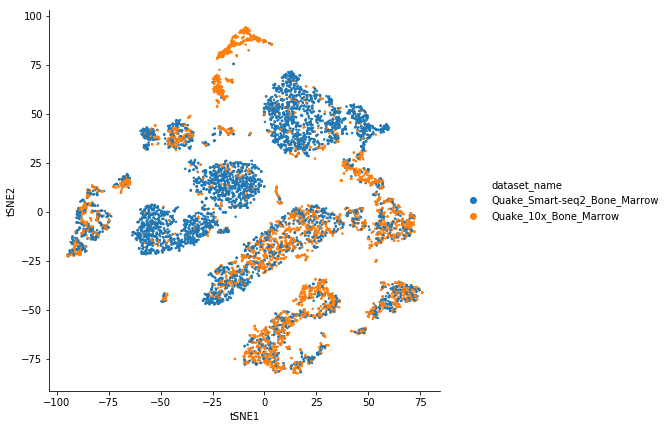

In [22]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bone_Marrow/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


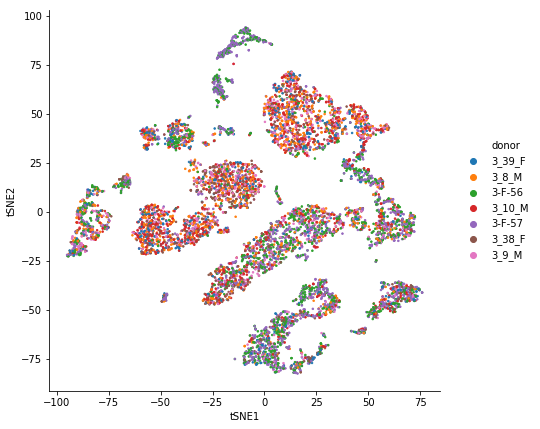

In [23]:
plot = mouse.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bone_Marrow/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


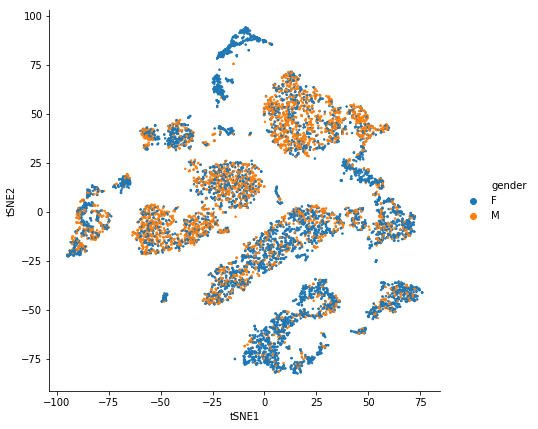

In [24]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bone_Marrow/gender.pdf", bbox_inches="tight")

In [25]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Bone_Marrow/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Bone_Marrow")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Bone_Marrow/model_1/checkpoint-132
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Bone_Marrow/model_2/checkpoint-152
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Bone_Marrow/model_3/checkpoint-127


In [26]:
with open("ALIGNED_Mus_musculus_Bone_Marrow/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Bone_Marrow/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [27]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Bone_Marrow")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9349
Accuracy = 0.8693


### Dahlin_10x

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id  \
AAACCTGAGACAAAGG-1_SIGAB1  bone marrow hematopoietic cell       CL:1001610   
AAACCTGAGATATACG-1_SIGAB1  bone marrow hematopoietic cell       CL:1001610   
AAACCTGAGATGGGTC-1_SIGAB1  bone marrow hematopoietic cell       CL:1001610   
AAACCTGAGGCAGGTT-1_SIGAB1  bone marrow hematopoietic cell       CL:1001610   
AAACCTGAGGCTAGGT-1_SIGAB1  bone marrow hematopoietic cell       CL:1001610   

                          cell_type1 dataset_name        organ      organism  \
AAACCTGAGACAAAGG-1_SIGAB1       HSPC   Dahlin_10x  Bone Marrow  Mus musculus   
AAACCTGAGATATACG-1_SIGAB1       HSPC   Dahlin_10x  Bone Marrow  Mus musculus   
AAACCTGAGATGGGTC-1_SIGAB1       HSPC   Dahlin_10x  Bone Marrow  Mus musculus   
AAACCTGAGGCAGGTT-1_SIGAB1       HSPC   Dahlin_10x  Bone Marrow  Mus musculus   
AAACCTGAGGCTAGGT-1_SIGAB1       HSPC   Dahlin_10x  Bone Marrow  Mus musculus   

                          platform  
AAACCTGAGACAAAGG-1_SIGAB1      10x  
AAACCTGAGATATACG-1_SIGAB1      10x  
AAACCTGAGATGGGTC-1_SIGAB1      10x  
AAACCTGAGGCAGGTT-1_SIGAB1      10x  
AAACCTGAGGCTAGGT-1_SIGAB1      10x

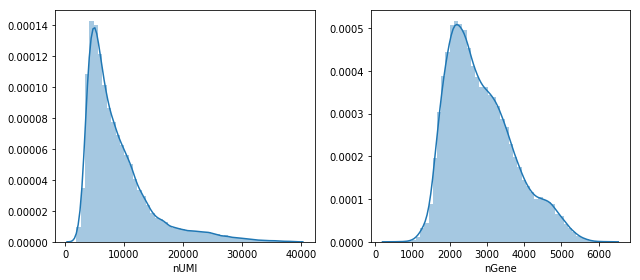

In [28]:
dahlin_10x = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Dahlin_10x/data.h5")
utils.peek(dahlin_10x, "Dahlin_10x")
dahlin_10x = dahlin_10x.normalize()
dahlin_10x.obs.head()

In [29]:
opt_model_kwargs = dict(h_dim=512)
dahlin_10x_model = cb.directi.fit_DIRECTi(
    dahlin_10x, dahlin_10x.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Dahlin_10x/model_0"
)
dahlin_10x.latent = dahlin_10x_model.inference(dahlin_10x)

[DIRECTi epoch 0] train=1.497, val=3.347, time elapsed=4.1s Best save...
[DIRECTi epoch 1] train=0.982, val=1.491, time elapsed=3.8s Best save...
[DIRECTi epoch 2] train=0.945, val=0.999, time elapsed=3.8s Best save...
[DIRECTi epoch 3] train=0.931, val=0.982, time elapsed=3.8s Best save...
[DIRECTi epoch 4] train=0.926, val=0.938, time elapsed=3.7s Best save...
[DIRECTi epoch 5] train=0.924, val=0.931, time elapsed=3.8s Best save...
[DIRECTi epoch 6] train=0.923, val=0.931, time elapsed=3.8s
[DIRECTi epoch 7] train=0.922, val=0.925, time elapsed=3.8s Best save...
[DIRECTi epoch 8] train=0.921, val=0.924, time elapsed=3.8s Best save...
[DIRECTi epoch 9] train=0.920, val=0.923, time elapsed=3.9s Best save...
[DIRECTi epoch 10] train=0.919, val=0.922, time elapsed=3.8s Best save...
[DIRECTi epoch 11] train=0.919, val=0.922, time elapsed=3.7s
[DIRECTi epoch 12] train=0.918, val=0.920, time elapsed=3.7s Best save...
[DIRECTi epoch 13] train=0.918, val=0.921, time elapsed=3.7s
[DIRECTi epoc

[  Info   ] Computing UMAP...


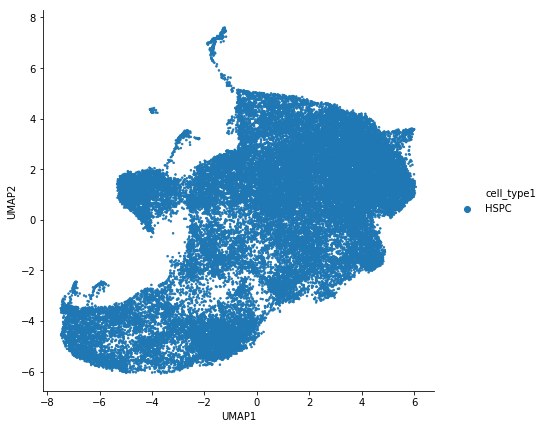

In [30]:
plot = dahlin_10x.visualize_latent("cell_type1", method="UMAP")
plot.get_figure().savefig("Dahlin_10x/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached UMAP...


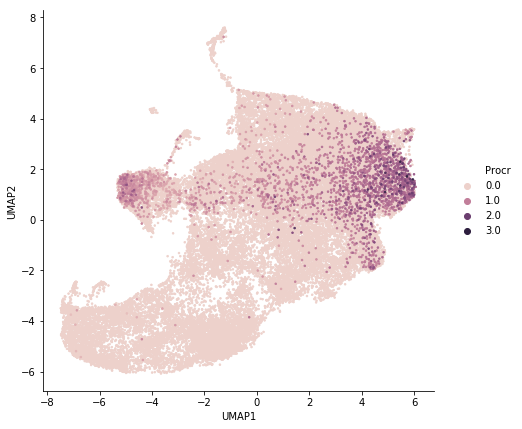

In [31]:
plot = dahlin_10x.visualize_latent("Procr", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


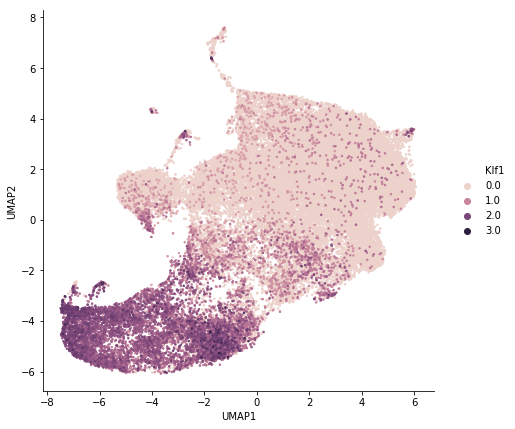

In [32]:
plot = dahlin_10x.visualize_latent("Klf1", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


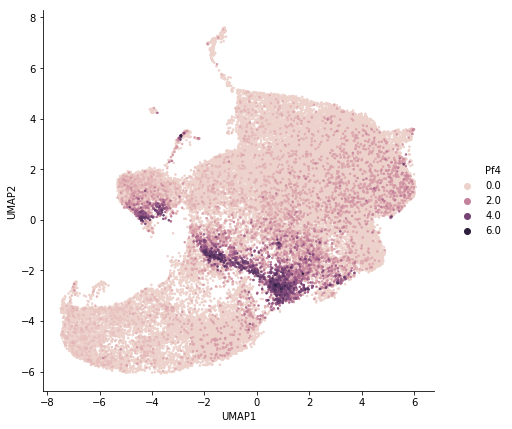

In [33]:
plot = dahlin_10x.visualize_latent("Pf4", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


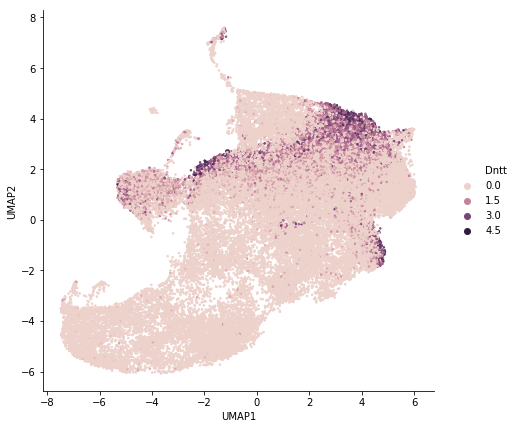

In [34]:
plot = dahlin_10x.visualize_latent("Dntt", method="UMAP")

[  Info   ] Using cached UMAP...


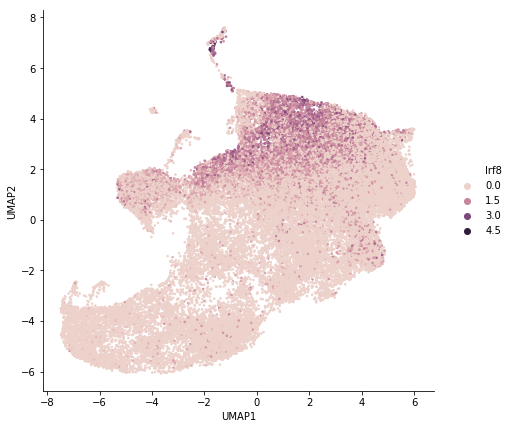

In [35]:
plot = dahlin_10x.visualize_latent("Irf8", method="UMAP")

[  Info   ] Using cached UMAP...


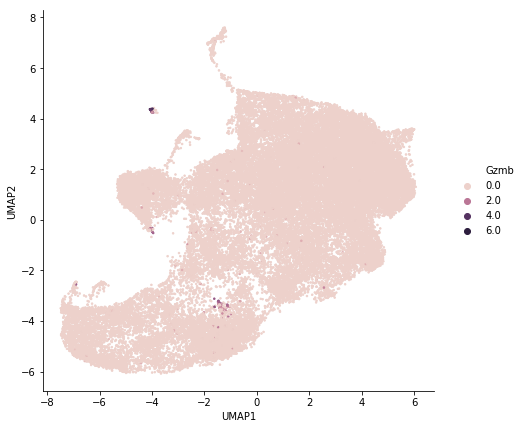

In [36]:
plot = dahlin_10x.visualize_latent("Gzmb", method="UMAP")

[  Info   ] Using cached UMAP...


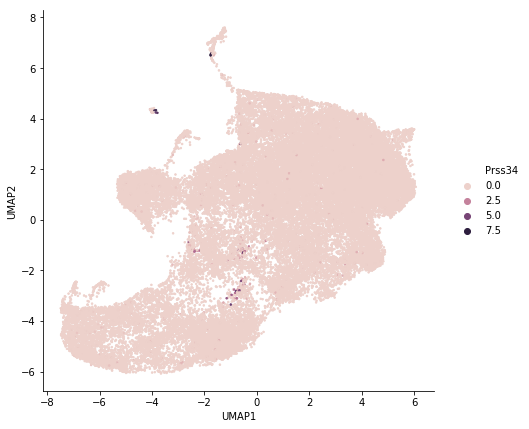

In [37]:
plot = dahlin_10x.visualize_latent("Prss34", method="UMAP")

In [38]:
%%capture capio
dahlin_10x_models = [dahlin_10x_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    dahlin_10x_models.append(cb.directi.fit_DIRECTi(
        dahlin_10x, dahlin_10x.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Dahlin_10x/model_%d" % i
    ))
dahlin_10x_blast = cb.blast.BLAST(dahlin_10x_models, dahlin_10x, keep_exprs=True).build_empirical()
dahlin_10x_blast.save("Dahlin_10x")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Dahlin_10x/model_1/checkpoint-80
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Dahlin_10x/model_2/checkpoint-46
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Dahlin_10x/model_3/checkpoint-71


In [39]:
with open("Dahlin_10x/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Dahlin_10x/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [40]:
utils.self_projection(dahlin_10x_blast, "Dahlin_10x")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9950
Accuracy = 1.0000


### Dahlin_mutant

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id  \
AAACCTGAGGCAGGTT-1_SIGAG8  bone marrow hematopoietic cell       CL:1001610   
AAACCTGCAAGCTGAG-1_SIGAG8  bone marrow hematopoietic cell       CL:1001610   
AAACCTGCAGATGGGT-1_SIGAG8  bone marrow hematopoietic cell       CL:1001610   
AAACCTGCATACAGCT-1_SIGAG8  bone marrow hematopoietic cell       CL:1001610   
AAACCTGCATCACGTA-1_SIGAG8  bone marrow hematopoietic cell       CL:1001610   

                          cell_type1   dataset_name        organ  \
AAACCTGAGGCAGGTT-1_SIGAG8       HSPC  Dahlin_mutant  Bone Marrow   
AAACCTGCAAGCTGAG-1_SIGAG8       HSPC  Dahlin_mutant  Bone Marrow   
AAACCTGCAGATGGGT-1_SIGAG8       HSPC  Dahlin_mutant  Bone Marrow   
AAACCTGCATACAGCT-1_SIGAG8       HSPC  Dahlin_mutant  Bone Marrow   
AAACCTGCATCACGTA-1_SIGAG8       HSPC  Dahlin_mutant  Bone Marrow   

                               organism platform  
AAACCTGAGGCAGGTT-1_SIGAG8  Mus musculus      10x  
AAACCTGCAAGCTGAG-1_SIGAG8  Mus musculus      10x  
AAACCTGCAGATGGGT-1_SIGAG8  Mus musculus      10x  
AAACCTGCATACAGCT-1_SIGAG8  Mus musculus      10x  
AAACCTGCATCACGTA-1_SIGAG8  Mus musculus      10x

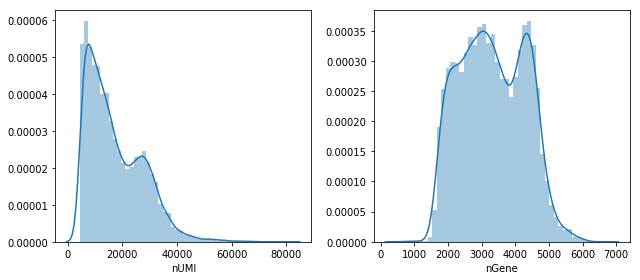

In [41]:
dahlin_mutant = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Dahlin_mutant/data.h5")
utils.peek(dahlin_mutant, "Dahlin_mutant")
dahlin_mutant = dahlin_mutant.normalize()
dahlin_mutant.obs.head()

In [42]:
opt_model_kwargs = dict(h_dim=512)
dahlin_mutant_model = cb.directi.fit_DIRECTi(
    dahlin_mutant, dahlin_mutant.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Dahlin_mutant/model_0"
)
dahlin_mutant.latent = dahlin_mutant_model.inference(dahlin_mutant)

[DIRECTi epoch 0] train=2.278, val=2.269, time elapsed=1.7s Best save...
[DIRECTi epoch 1] train=1.657, val=3.877, time elapsed=1.1s
[DIRECTi epoch 2] train=1.057, val=4.535, time elapsed=1.1s
[DIRECTi epoch 3] train=1.001, val=2.963, time elapsed=1.1s
[DIRECTi epoch 4] train=0.972, val=1.863, time elapsed=1.1s Best save...
[DIRECTi epoch 5] train=0.953, val=2.088, time elapsed=1.1s
[DIRECTi epoch 6] train=0.940, val=1.675, time elapsed=1.1s Best save...
[DIRECTi epoch 7] train=0.930, val=1.108, time elapsed=1.1s Best save...
[DIRECTi epoch 8] train=0.922, val=1.015, time elapsed=1.2s Best save...
[DIRECTi epoch 9] train=0.913, val=0.985, time elapsed=1.1s Best save...
[DIRECTi epoch 10] train=0.905, val=0.992, time elapsed=1.1s
[DIRECTi epoch 11] train=0.901, val=0.961, time elapsed=1.1s Best save...
[DIRECTi epoch 12] train=0.898, val=0.928, time elapsed=1.1s Best save...
[DIRECTi epoch 13] train=0.896, val=0.922, time elapsed=1.2s Best save...
[DIRECTi epoch 14] train=0.893, val=0.9

[  Info   ] Computing UMAP...


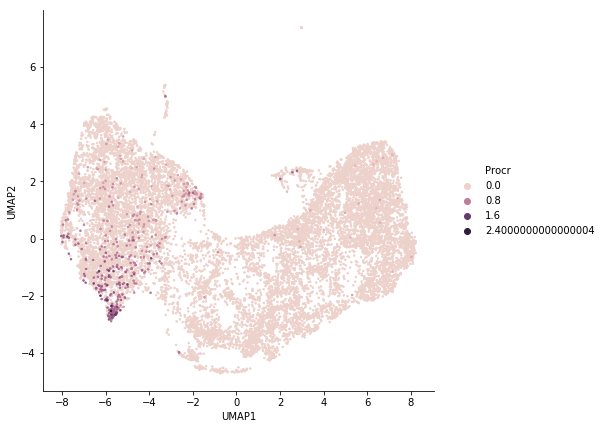

In [43]:
plot = dahlin_mutant.visualize_latent("Procr", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


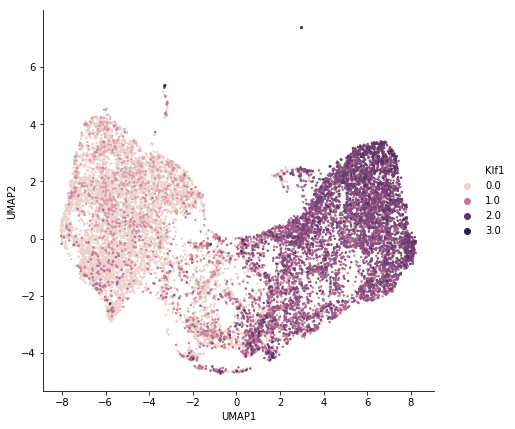

In [44]:
plot = dahlin_mutant.visualize_latent("Klf1", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


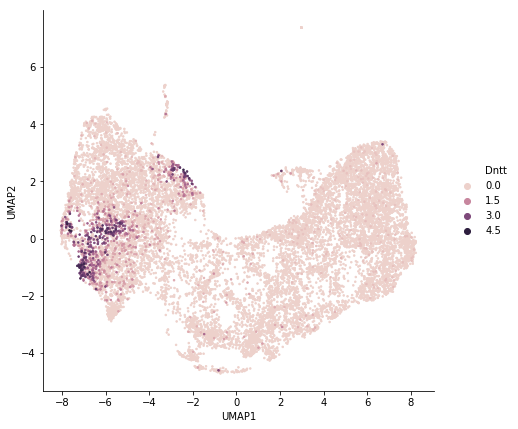

In [45]:
plot = dahlin_mutant.visualize_latent("Dntt", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


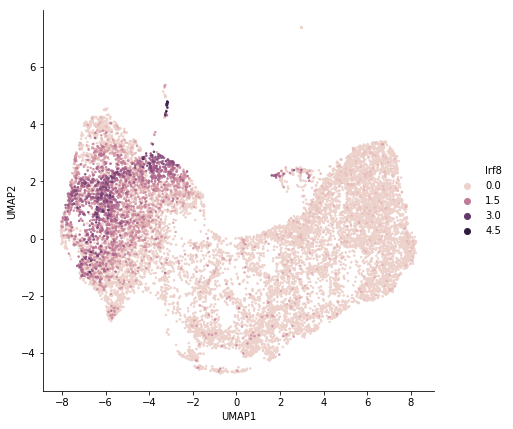

In [46]:
plot = dahlin_mutant.visualize_latent("Irf8", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


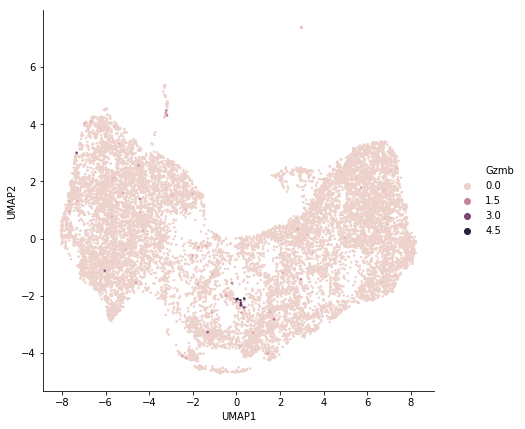

In [47]:
plot = dahlin_mutant.visualize_latent("Gzmb", method="UMAP", sort=True)

[  Info   ] Using cached UMAP...


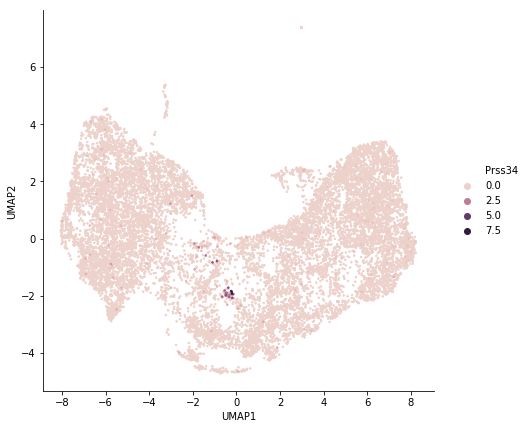

In [48]:
plot = dahlin_mutant.visualize_latent("Prss34", method="UMAP", sort=True)

In [49]:
%%capture capio
dahlin_mutant_models = [dahlin_mutant_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    dahlin_mutant_models.append(cb.directi.fit_DIRECTi(
        dahlin_mutant, dahlin_mutant.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Dahlin_mutant/model_%d" % i
    ))
dahlin_mutant_blast = cb.blast.BLAST(dahlin_mutant_models, dahlin_mutant, 
                                               keep_exprs=True).build_empirical()
dahlin_mutant_blast.save("Dahlin_mutant")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Dahlin_mutant/model_1/checkpoint-78
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Dahlin_mutant/model_2/checkpoint-60
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Dahlin_mutant/model_3/checkpoint-70


In [50]:
with open("Dahlin_mutant/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Dahlin_mutant/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [51]:
utils.self_projection(dahlin_mutant_blast, "Dahlin_mutant")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9834
Accuracy = 1.0000


### Tusi

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Ba             D             E         G            Ly  \
bBM1  7.831278e-06  3.353070e-04  2.771369e-05  0.999434  5.187193e-05   
bBM4  1.171316e-07  1.292090e-05  2.148675e-07  0.999985  4.283474e-07   
bBM7  6.272369e-05  2.321887e-03  1.915471e-04  0.995933  3.734121e-04   
bBM8  9.035096e-07  4.913719e-05  2.280984e-06  0.999928  5.363046e-06   
bBM9  1.180611e-13  2.407172e-12  1.848457e-13  1.000000  3.003152e-13   

                 M           Meg      batch             cell_ontology_class  \
bBM1  1.389437e-04  3.941315e-06  basal_bm1  bone marrow hematopoietic cell   
bBM4  1.505495e-06  4.056458e-08  basal_bm1  bone marrow hematopoietic cell   
bBM7  1.084162e-03  3.297559e-05  basal_bm1  bone marrow hematopoietic cell   
bBM8  1.385166e-05  3.910432e-07  basal_bm1  bone marrow hematopoietic cell   
bBM9  1.186066e-12  3.433513e-14  basal_bm1  bone marrow hematopoietic cell   

     cell_ontology_id cell_type1 dataset_name        organ      organism  \
bBM1       CL:1001610       HSPC         Tusi  Bone Marrow  Mus musculus   
bBM4       CL:1001610       HSPC         Tusi  Bone Marrow  Mus musculus   
bBM7       CL:1001610       HSPC         Tusi  Bone Marrow  Mus musculus   
bBM8       CL:1001610       HSPC         Tusi  Bone Marrow  Mus musculus   
bBM9       CL:1001610       HSPC         Tusi  Bone Marrow  Mus musculus   

     platform  potential  
bBM1   inDrop  18.522801  
bBM4   inDrop  16.236444  
bBM7   inDrop  19.366015  
bBM8   inDrop  17.339277  
bBM9   inDrop  10.256963

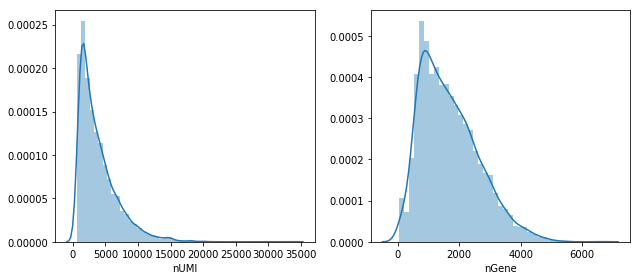

In [52]:
tusi = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Tusi/data.h5")
utils.peek(tusi, "Tusi")
tusi = tusi.normalize()
tusi.obs.head()

In [53]:
tusi_model = cb.directi.fit_DIRECTi(
    tusi, tusi.uns["seurat_genes"],
    **fixed_model_kwargs, 
    path="/tmp/cb/db/Tusi/model_0"
)
tusi.latent = tusi_model.inference(tusi)

[DIRECTi epoch 0] train=1.931, val=1.954, time elapsed=0.9s Best save...
[DIRECTi epoch 1] train=1.927, val=1.947, time elapsed=0.3s Best save...
[DIRECTi epoch 2] train=1.914, val=1.927, time elapsed=0.3s Best save...
[DIRECTi epoch 3] train=1.888, val=1.891, time elapsed=0.3s Best save...
[DIRECTi epoch 4] train=1.640, val=1.219, time elapsed=0.3s Best save...
[DIRECTi epoch 5] train=0.778, val=0.823, time elapsed=0.3s Best save...
[DIRECTi epoch 6] train=0.684, val=0.746, time elapsed=0.3s Best save...
[DIRECTi epoch 7] train=0.682, val=0.723, time elapsed=0.3s Best save...
[DIRECTi epoch 8] train=0.680, val=0.714, time elapsed=0.3s Best save...
[DIRECTi epoch 9] train=0.679, val=0.701, time elapsed=0.3s Best save...
[DIRECTi epoch 10] train=0.678, val=0.690, time elapsed=0.3s Best save...
[DIRECTi epoch 11] train=0.678, val=0.694, time elapsed=0.3s
[DIRECTi epoch 12] train=0.676, val=0.691, time elapsed=0.3s
[DIRECTi epoch 13] train=0.665, val=0.688, time elapsed=0.3s Best save...


[  Info   ] Computing UMAP...


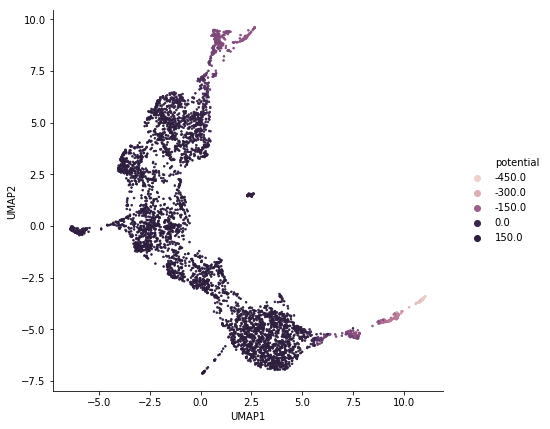

In [54]:
plot = tusi.visualize_latent("potential", method="UMAP")
plot.get_figure().savefig("Tusi/potential.pdf", bbox_inches="tight")

[  Info   ] Using cached UMAP...


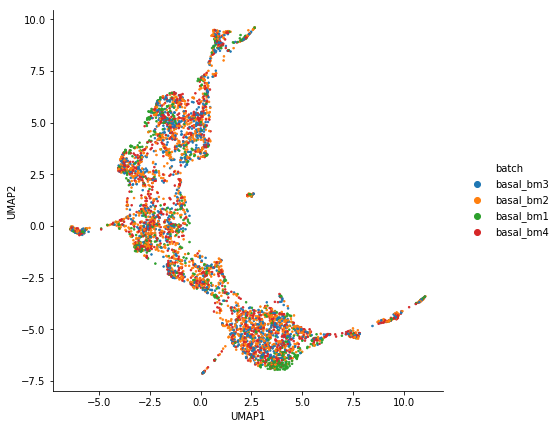

In [55]:
plot = tusi.visualize_latent("batch", method="UMAP")
plot.get_figure().savefig("Tusi/batch.pdf", bbox_inches="tight")

In [56]:
%%capture capio
tusi_models = [tusi_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    tusi_models.append(cb.directi.fit_DIRECTi(
        tusi, tusi.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Tusi/model_%d" % i
    ))
tusi_blast = cb.blast.BLAST(tusi_models, tusi, 
                                               keep_exprs=True).build_empirical()
tusi_blast.save("Tusi")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tusi/model_1/checkpoint-135
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tusi/model_2/checkpoint-152
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tusi/model_3/checkpoint-109


In [57]:
with open("Tusi/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Tusi/stderr.txt", "w") as f:
    f.write(capio.stderr)

### Velten_Smart-seq2

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


age             cell_ontology_class cell_ontology_id  \
I1_plate10_A_10  25.0  bone marrow hematopoietic cell       CL:1001610   
I1_plate10_A_11  25.0  bone marrow hematopoietic cell       CL:1001610   
I1_plate10_A_12  25.0  bone marrow hematopoietic cell       CL:1001610   
I1_plate10_A_1   25.0  bone marrow hematopoietic cell       CL:1001610   
I1_plate10_A_4   25.0  bone marrow hematopoietic cell       CL:1001610   

                cell_type1       dataset_name donor gender        organ  \
I1_plate10_A_10       HSPC  Velten_Smart-seq2    I1   male  Bone Marrow   
I1_plate10_A_11       HSPC  Velten_Smart-seq2    I1   male  Bone Marrow   
I1_plate10_A_12       HSPC  Velten_Smart-seq2    I1   male  Bone Marrow   
I1_plate10_A_1        HSPC  Velten_Smart-seq2    I1   male  Bone Marrow   
I1_plate10_A_4        HSPC  Velten_Smart-seq2    I1   male  Bone Marrow   

                     organism    platform  
I1_plate10_A_10  Homo sapiens  Smart-seq2  
I1_plate10_A_11  Homo sapiens  Smart-seq2  
I1_plate10_A_12  Homo sapiens  Smart-seq2  
I1_plate10_A_1   Homo sapiens  Smart-seq2  
I1_plate10_A_4   Homo sapiens  Smart-seq2

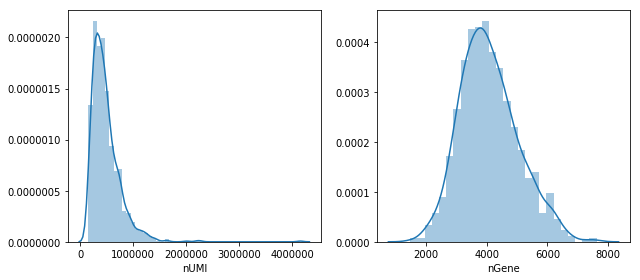

In [58]:
velten_smart_seq2 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Velten_Smart-seq2/data.h5")
utils.peek(velten_smart_seq2, "Velten_Smart-seq2")
velten_smart_seq2 = velten_smart_seq2.normalize()
velten_smart_seq2.obs.head()

In [59]:
opt_model_keargs = dict(batch_size=64)
velten_smart_seq2_model = cb.directi.fit_DIRECTi(
    velten_smart_seq2, velten_smart_seq2.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_keargs,
    path="/tmp/cb/db/Velten_Smart-seq2/model_0"
)
velten_smart_seq2.latent = velten_smart_seq2_model.inference(velten_smart_seq2)

[DIRECTi epoch 0] train=1.896, val=1.959, time elapsed=0.7s Best save...
[DIRECTi epoch 1] train=1.894, val=1.959, time elapsed=0.1s Best save...
[DIRECTi epoch 2] train=1.894, val=1.957, time elapsed=0.1s Best save...
[DIRECTi epoch 3] train=1.893, val=1.954, time elapsed=0.1s Best save...
[DIRECTi epoch 4] train=1.887, val=1.950, time elapsed=0.1s Best save...
[DIRECTi epoch 5] train=1.883, val=1.943, time elapsed=0.1s Best save...
[DIRECTi epoch 6] train=1.875, val=1.934, time elapsed=0.1s Best save...
[DIRECTi epoch 7] train=1.864, val=1.923, time elapsed=0.1s Best save...
[DIRECTi epoch 8] train=1.854, val=1.908, time elapsed=0.1s Best save...
[DIRECTi epoch 9] train=1.836, val=1.882, time elapsed=0.1s Best save...
[DIRECTi epoch 10] train=1.720, val=1.617, time elapsed=0.1s Best save...
[DIRECTi epoch 11] train=1.346, val=1.305, time elapsed=0.1s Best save...
[DIRECTi epoch 12] train=1.053, val=1.198, time elapsed=0.1s Best save...
[DIRECTi epoch 13] train=1.001, val=1.071, time 

[  Info   ] Computing UMAP...


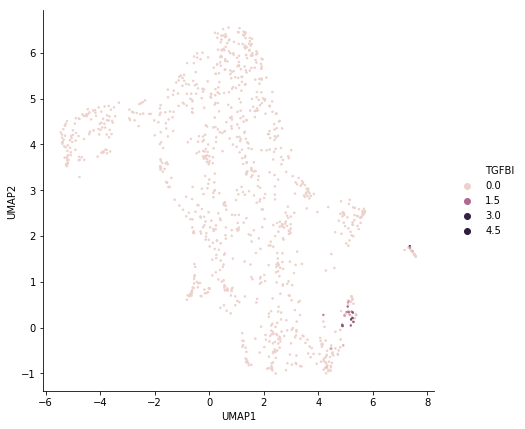

In [60]:
plot = velten_smart_seq2.visualize_latent("TGFBI", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


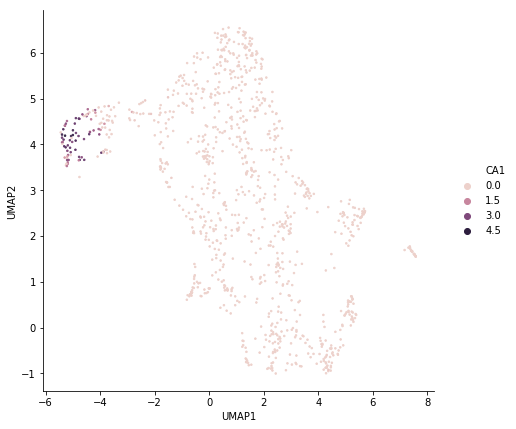

In [61]:
plot = velten_smart_seq2.visualize_latent("CA1", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


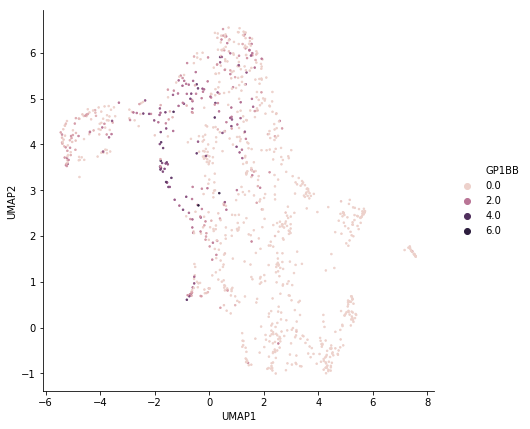

In [62]:
plot = velten_smart_seq2.visualize_latent("GP1BB", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


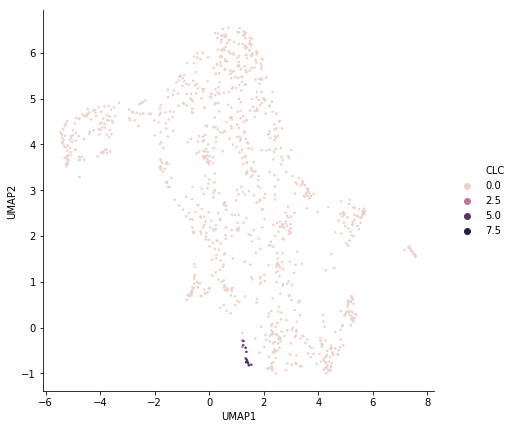

In [63]:
plot = velten_smart_seq2.visualize_latent("CLC", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


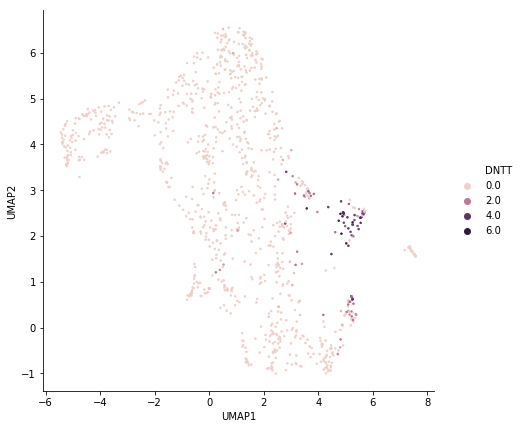

In [64]:
plot = velten_smart_seq2.visualize_latent("DNTT", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


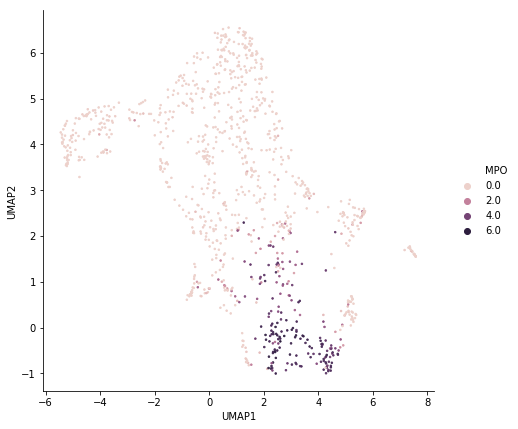

In [65]:
plot = velten_smart_seq2.visualize_latent("MPO", method="UMAP", dr_kws=dict(n_neighbors=20))

In [66]:
%%capture capio
velten_smart_seq2_models = [velten_smart_seq2_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    velten_smart_seq2_models.append(cb.directi.fit_DIRECTi(
        velten_smart_seq2, velten_smart_seq2.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_keargs,
        random_seed=i, path="/tmp/cb/db/Velten_Smart-seq2/model_%d" % i
    ))
velten_smart_seq2_blast = cb.blast.BLAST(velten_smart_seq2_models, velten_smart_seq2, 
                                               keep_exprs=True).build_empirical()
velten_smart_seq2_blast.save("Velten_Smart-seq2")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Velten_Smart-seq2/model_1/checkpoint-208
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Velten_Smart-seq2/model_2/checkpoint-184
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Velten_Smart-seq2/model_3/checkpoint-203


In [67]:
with open("Velten_Smart-seq2/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Velten_Smart-seq2/stderr.txt", "w") as f:
    f.write(capio.stderr)

## Human aligned

In [68]:
if not os.path.exists("ALIGNED_Homo_sapiens_Bone_Marrow"):
    os.makedirs("ALIGNED_Homo_sapiens_Bone_Marrow")
velten_quartz_seq = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Velten_QUARTZ-seq/data.h5").normalize()
#velten_smart_seq2 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Velten_Smart-seq2/data.h5").normalize()
human = cb.data.ExprDataSet.merge_datasets(dict(
    velten_quartz_seq=velten_quartz_seq,
    velten_smart_seq2=velten_smart_seq2
), merge_uns_slots=["seurat_genes"])

[ Warning ] 838 out of 13013 variables are not found, will be set to zero!
[ Warning ] 733 out of 13013 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [69]:
human.obs.head()

UMAP1  UMAP2   age             cell_ontology_class  \
I2_plate14_A_10    NaN    NaN  29.0  bone marrow hematopoietic cell   
I2_plate14_A_4     NaN    NaN  29.0  bone marrow hematopoietic cell   
I2_plate14_A_5     NaN    NaN  29.0  bone marrow hematopoietic cell   
I2_plate14_A_8     NaN    NaN  29.0  bone marrow hematopoietic cell   
I2_plate14_A_9     NaN    NaN  29.0  bone marrow hematopoietic cell   

                cell_ontology_id cell_type1       dataset_name donor  gender  \
I2_plate14_A_10       CL:1001610       HSPC  Velten_QUARTZ-seq    I2  female   
I2_plate14_A_4        CL:1001610       HSPC  Velten_QUARTZ-seq    I2  female   
I2_plate14_A_5        CL:1001610       HSPC  Velten_QUARTZ-seq    I2  female   
I2_plate14_A_8        CL:1001610       HSPC  Velten_QUARTZ-seq    I2  female   
I2_plate14_A_9        CL:1001610       HSPC  Velten_QUARTZ-seq    I2  female   

                 latent_1     ...      latent_3  latent_4  latent_5  latent_6  \
I2_plate14_A_10       NaN     ...           NaN       NaN       NaN       NaN   
I2_plate14_A_4        NaN     ...           NaN       NaN       NaN       NaN   
I2_plate14_A_5        NaN     ...           NaN       NaN       NaN       NaN   
I2_plate14_A_8        NaN     ...           NaN       NaN       NaN       NaN   
I2_plate14_A_9        NaN     ...           NaN       NaN       NaN       NaN   

                 latent_7  latent_8  latent_9        organ      organism  \
I2_plate14_A_10       NaN       NaN       NaN  Bone Marrow  Homo sapiens   
I2_plate14_A_4        NaN       NaN       NaN  Bone Marrow  Homo sapiens   
I2_plate14_A_5        NaN       NaN       NaN  Bone Marrow  Homo sapiens   
I2_plate14_A_8        NaN       NaN       NaN  Bone Marrow  Homo sapiens   
I2_plate14_A_9        NaN       NaN       NaN  Bone Marrow  Homo sapiens   

                   platform  
I2_plate14_A_10  QUARTZ-seq  
I2_plate14_A_4   QUARTZ-seq  
I2_plate14_A_5   QUARTZ-seq  
I2_plate14_A_8   QUARTZ-seq  
I2_plate14_A_9   QUARTZ-seq  

[5 rows x 22 columns]

In [70]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name"],
    rmbatch_module_kwargs=dict(lambda_reg=0.02)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
human_model = cb.directi.fit_DIRECTi(
    human, human.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Homo_sapiens_Bone_Marrow/model_0"
)
human.latent = human_model.inference(human)

[DIRECTi epoch 0] train=1.520, val=1.666, time elapsed=0.8s Regular save...
[DIRECTi epoch 1] train=1.519, val=1.666, time elapsed=0.1s
[DIRECTi epoch 2] train=1.518, val=1.666, time elapsed=0.1s
[DIRECTi epoch 3] train=1.517, val=1.665, time elapsed=0.1s
[DIRECTi epoch 4] train=1.518, val=1.665, time elapsed=0.1s
[DIRECTi epoch 5] train=1.519, val=1.664, time elapsed=0.1s
[DIRECTi epoch 6] train=1.516, val=1.662, time elapsed=0.1s
[DIRECTi epoch 7] train=1.515, val=1.660, time elapsed=0.1s
[DIRECTi epoch 8] train=1.514, val=1.657, time elapsed=0.1s
[DIRECTi epoch 9] train=1.510, val=1.654, time elapsed=0.1s
[DIRECTi epoch 10] train=1.508, val=1.649, time elapsed=0.1s Regular save...
[DIRECTi epoch 11] train=1.502, val=1.644, time elapsed=0.1s
[DIRECTi epoch 12] train=1.497, val=1.638, time elapsed=0.1s
[DIRECTi epoch 13] train=1.491, val=1.630, time elapsed=0.1s
[DIRECTi epoch 14] train=1.479, val=1.616, time elapsed=0.1s
[DIRECTi epoch 15] train=1.461, val=1.583, time elapsed=0.1s
[D

[  Info   ] Computing UMAP...


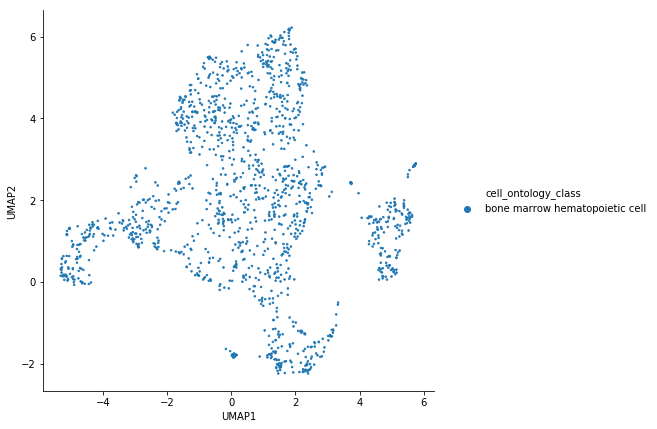

In [71]:
plot = human.visualize_latent("cell_ontology_class", method="UMAP", dr_kws=dict(n_neighbors=20), reuse=False)
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Bone_Marrow/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached UMAP...


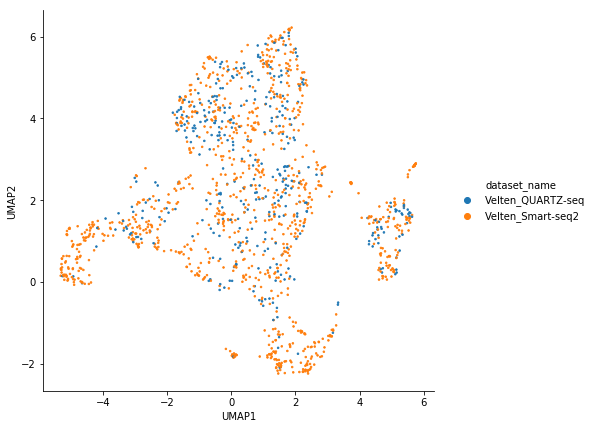

In [72]:
plot = human.visualize_latent("dataset_name", method="UMAP", dr_kws=dict(n_neighbors=20))
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Bone_Marrow/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached UMAP...


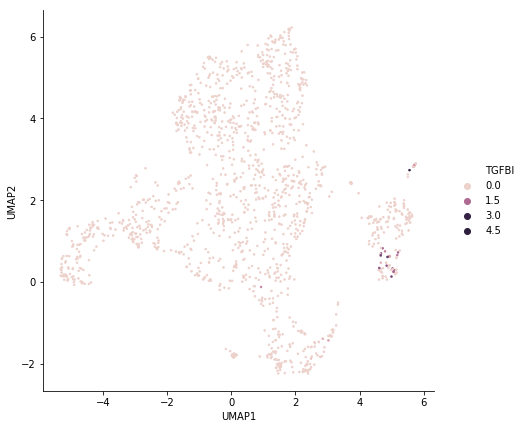

In [73]:
plot = human.visualize_latent("TGFBI", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


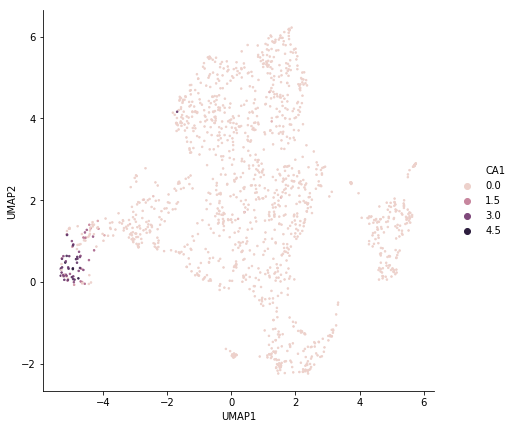

In [74]:
plot = human.visualize_latent("CA1", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


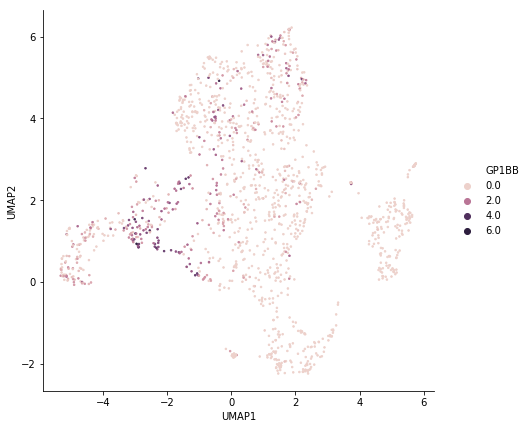

In [75]:
plot = human.visualize_latent("GP1BB", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


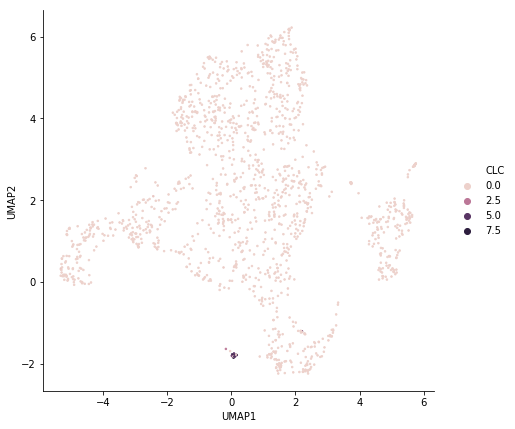

In [76]:
plot = human.visualize_latent("CLC", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


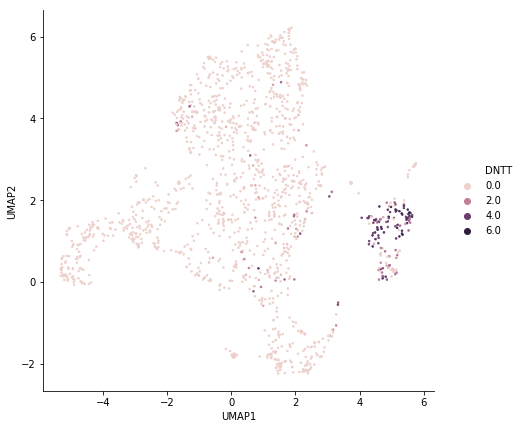

In [77]:
plot = human.visualize_latent("DNTT", method="UMAP", dr_kws=dict(n_neighbors=20))

[  Info   ] Using cached UMAP...


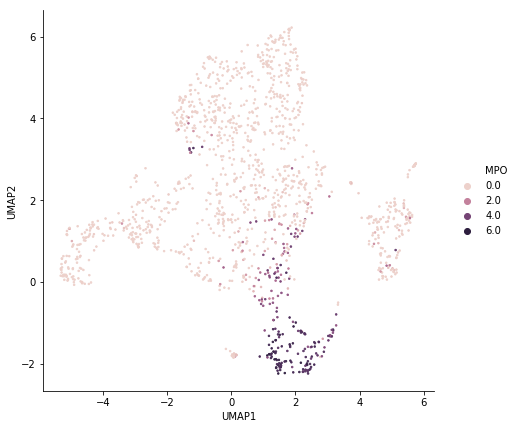

In [78]:
plot = human.visualize_latent("MPO", method="UMAP", dr_kws=dict(n_neighbors=20))

In [79]:
%%capture capio
human_models = [human_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    human_models.append(cb.directi.fit_DIRECTi(
        human, human.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Homo_sapiens_Bone_Marrow/model_%d" % i
    ))
human_blast = cb.blast.BLAST(human_models, human, keep_exprs=True).build_empirical()
human_blast.save("ALIGNED_Homo_sapiens_Bone_Marrow")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Bone_Marrow/model_1/checkpoint-239
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Bone_Marrow/model_2/checkpoint-263
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Bone_Marrow/model_3/checkpoint-197


In [80]:
with open("ALIGNED_Homo_sapiens_Bone_Marrow/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Homo_sapiens_Bone_Marrow/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [81]:
utils.self_projection(human_blast, "ALIGNED_Homo_sapiens_Bone_Marrow")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9173
Accuracy = 1.0000
